Alumno: Erick Salvador Alvarez Valencia

## Señales simétricas y antisimétricas

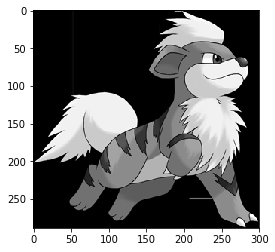

In [2]:
import numpy as np
import skimage
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg

%matplotlib inline

img = rgb2gray(mpimg.imread("Growlithe.png"))
plt.imshow(img, cmap = "gray")

Generamos las funciones para reflejar una imagen en X y en Y.

In [3]:
def reflected_x(img):
    res = np.zeros(img.shape, dtype = 'double')
    for i in range(img.shape[0]):
        jf = img.shape[1] - 1
        for j in range(img.shape[1]):
            res[i][jf] = img[i][j]
            jf -= 1
    return res

def reflected_y(img):
    res = np.zeros(img.shape, dtype = 'double')
    for j in range(img.shape[1]):
        ifp = img.shape[0] - 1
        for i in range(img.shape[0]):
            res[ifp][j] = img[i][j]
            ifp -= 1
    return res

Aplicamos las funciones anteriores a la imagen original y mostramos el resultado.

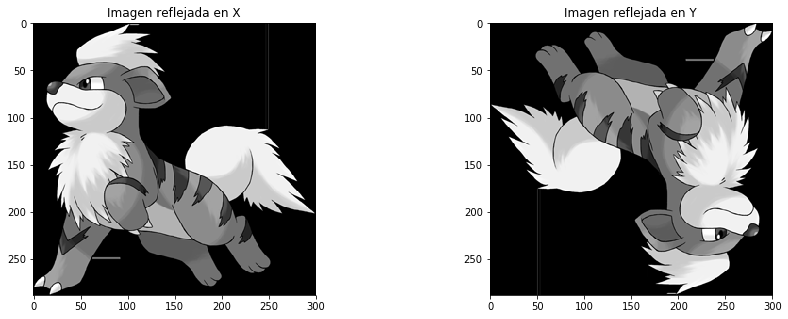

In [5]:
neg_x = reflected_x(img)
neg_y = reflected_y(img)

fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.set_title("Imagen reflejada en X")
ax2.set_title("Imagen reflejada en Y")

ax1.imshow(neg_x, cmap = "gray")
ax2.imshow(neg_y, cmap = "gray")

Definimos las funciones para generar una imagen simétrica y una antisimétrica las cuales son: $$f_s(n) = \frac{1}{2}[g(n) + g(-n)]$$ y $$f_{as}(n) = \frac{1}{2}[g(n) - g(-n)]$$ Donde $g(n)$ es la imagen original y $g(-n)$ es la imagen reflejada ya sea en $X$ o en $Y$.

In [6]:
def symmetric_x(img):
    neg_x = reflected_x(img)
    res = np.zeros(img.shape, dtype = 'double')
    res = (img + neg_x) / 2.0
    return res

def symmetric_y(img):
    neg_y = reflected_y(img)
    res = np.zeros(img.shape, dtype = 'double')
    res = (img + neg_y) / 2.0
    return res

def antisymmetric_x(img):
    neg_x = reflected_x(img)
    res = np.zeros(img.shape, dtype = 'double')
    res = (img - neg_x) / 2.0
    return res

def antisymmetric_y(img):
    neg_y = reflected_y(img)
    res = np.zeros(img.shape, dtype = 'double')
    res = (img - neg_y) / 2.0
    return res

Llamamos a las funciones definidas anteriormente y mostrarmos los resultados.

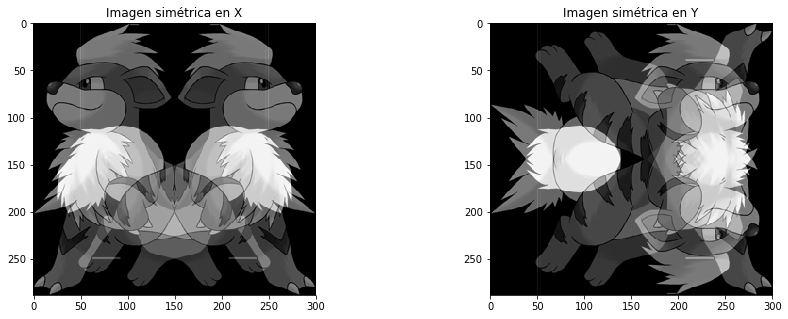

In [8]:
s_x = symmetric_x(img)
s_y = symmetric_y(img)

fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_title("Imagen simétrica en X")
ax2.set_title("Imagen simétrica en Y")

ax1.imshow(s_x, cmap = "gray")
ax2.imshow(s_y, cmap = "gray")

Hacemos lo mismo con las funciones antisimétricas.

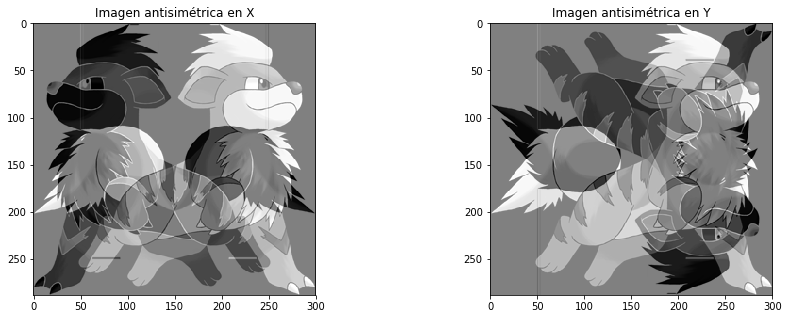

In [9]:
as_x = antisymmetric_x(img)
as_y = antisymmetric_y(img)

fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_title("Imagen antisimétrica en X")
ax2.set_title("Imagen antisimétrica en Y")

ax1.imshow(as_x, cmap = "gray")
ax2.imshow(as_y, cmap = "gray")

Reconstruimos la imagen original. Esto se hace sumando las imágenes simétricas con las antisimétricas.

In [10]:
def reconstruct_x(s_x, as_x):
    res = np.zeros(img.shape, dtype = 'double')
    res = s_x + as_x
    return res

def reconstruct_y(s_y, as_y):
    res = np.zeros(img.shape, dtype = 'double')
    res = s_y + as_y
    return res

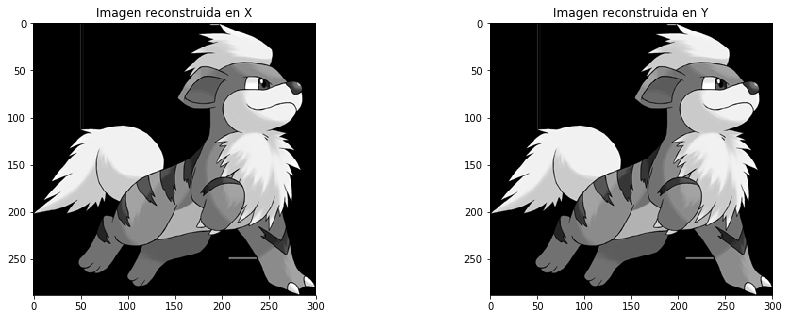

In [12]:
s_x = symmetric_x(img)
s_y = symmetric_y(img)
as_x = antisymmetric_x(img)
as_y = antisymmetric_y(img)

rec_x = reconstruct_x(s_x, as_x)
rec_y = reconstruct_y(s_y, as_y)

fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_title("Imagen reconstruida en X")
ax2.set_title("Imagen reconstruida en Y")

ax1.imshow(rec_x, cmap = "gray")
ax2.imshow(rec_y, cmap = "gray")

## Sistemas invariantes

## Sistemas lineales

In [13]:
def s1(g, n):
    return n * g

def s2(g):
    #Eso es así ya que la función tiene que ver definida como g(n^2)
    return g

def s3 (g):
    return g * g

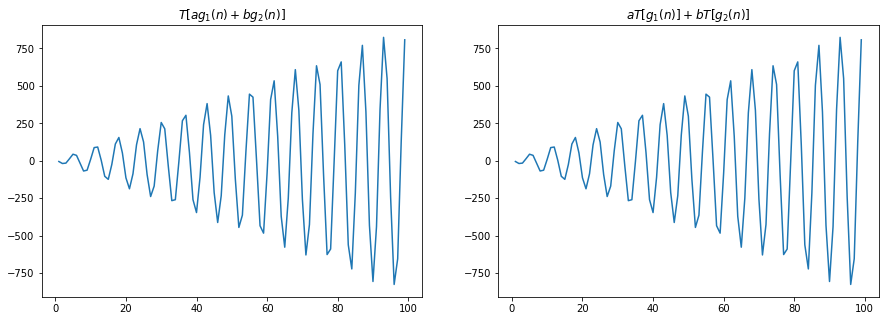

In [22]:
a = 4.0
b = -8.0

n = np.arange(1, 100, dtype = 'float')

f1 = np.cos(n)
f2 = np.sin(n)

r1 = s1(a * f1 + b * f2, n)
r2 = a * s1(f1, n) + b * s1(f2, n)

fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_title("$T[ag_1(n) + bg_2(n)]$")
ax2.set_title("$aT[g_1(n)] + bT[g_2(n)]$")

ax1.plot(n, r1)
ax2.plot(n, r2)

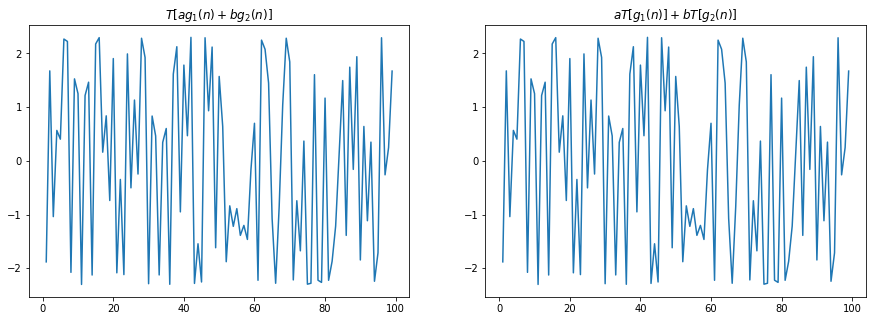

In [23]:
a = 0.1
b = -2.3

n = np.arange(1, 100, dtype = 'float')

f1 = np.cos(n * n)
f2 = np.sin(n * n)

r1 = s2(a * f1 + b * f2)
r2 = a * s2(f1) + b * s2(f2)

fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_title("$T[ag_1(n) + bg_2(n)]$")
ax2.set_title("$aT[g_1(n)] + bT[g_2(n)]$")

ax1.plot(n, r1)
ax2.plot(n, r2)

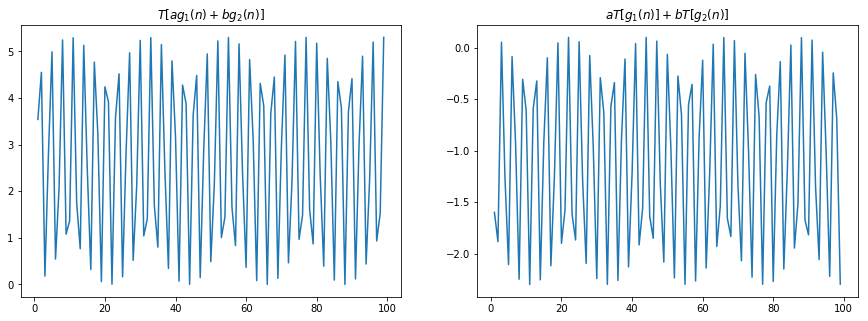

In [24]:
a = 0.1
b = -2.3

n = np.arange(1, 100, dtype = 'float')

f1 = np.cos(n)
f2 = np.sin(n)

r1 = s3(a * f1 + b * f2)
r2 = a * s3(f1) + b * s3(f2)

fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_title("$T[ag_1(n) + bg_2(n)]$")
ax2.set_title("$aT[g_1(n)] + bT[g_2(n)]$")

ax1.plot(n, r1)
ax2.plot(n, r2)